In [1]:
!pip install gensim

In [2]:
import gensim
from sklearn.manifold import TSNE
import numpy as np

In [23]:
my_vocab = ['apple','orange','shimla','banana','maruti','mumbai','china','india','husband'
            ,'wife','brother','sister','red','yellow','computer','mobile','pear','guava']

In [24]:
import gensim.downloader as api

In [25]:
glove_model = api.load('glove-wiki-gigaword-300')

In [26]:
glove_model.most_similar('love')

[('loves', 0.6420262455940247),
 ('passion', 0.6261469125747681),
 ('loved', 0.595270574092865),
 ('romantic', 0.5921086072921753),
 ('lovers', 0.5904366970062256),
 ('lover', 0.5841912627220154),
 ('you', 0.5837852954864502),
 ('me', 0.5835772752761841),
 ('affection', 0.581821858882904),
 ('always', 0.5701122283935547)]

In [32]:
glove_model.most_similar('apple')

[('iphone', 0.5987043380737305),
 ('macintosh', 0.5836331248283386),
 ('ipod', 0.5761123895645142),
 ('microsoft', 0.5663833022117615),
 ('ipad', 0.5628098249435425),
 ('intel', 0.5457562804222107),
 ('ibm', 0.5286195278167725),
 ('google', 0.5282472968101501),
 ('imac', 0.507252037525177),
 ('software', 0.4962984323501587)]

In [7]:
glove_model.most_similar('love',topn=5)

[('loves', 0.6420262455940247),
 ('passion', 0.6261469125747681),
 ('loved', 0.595270574092865),
 ('romantic', 0.5921086072921753),
 ('lovers', 0.5904366970062256)]

In [8]:
glove_model.most_similar(positive = ['woman','husband'],negative = ['man'],topn= 1)

[('wife', 0.7732622027397156)]

In [9]:
glove_model['banana']

array([ 4.2141e-01,  2.0467e-02,  1.2666e-01,  3.9762e-01, -1.1016e-01,
       -3.5956e-02, -4.7214e-01, -1.3916e-01,  5.6812e-01, -3.4969e-01,
       -9.3232e-02, -1.7035e-01, -3.8677e-01, -1.6811e-01, -1.0157e-01,
       -2.6612e-01,  4.8094e-02, -4.6771e-01, -6.0725e-01,  4.0952e-01,
        3.1771e-01,  5.0098e-01,  6.6368e-01, -1.1827e-01, -7.4267e-01,
       -1.0472e-01, -6.4353e-01, -4.4023e-01, -3.9101e-01,  3.5694e-01,
       -9.3489e-01,  4.8317e-01,  1.5223e-01,  7.9339e-02, -2.5111e-01,
        3.9968e-01, -1.7982e-01, -2.8874e-01, -1.0891e-01,  3.8821e-01,
       -2.3147e-01, -5.0337e-01, -2.5231e-01, -2.2184e-02, -2.7874e-01,
       -2.4193e-01,  5.7466e-02, -5.3955e-01, -3.4875e-02, -4.0482e-01,
       -3.8067e-02, -4.2337e-01,  4.2861e-01,  3.5166e-01, -1.8165e-01,
       -3.1131e-01, -5.3276e-01, -5.0954e-02,  6.6779e-01, -4.0077e-01,
        2.1403e-01, -2.9861e-01, -3.6637e-01,  2.8489e-01, -3.7663e-01,
        5.9604e-02, -3.1795e-01,  2.5463e-01, -2.2185e-01,  2.30

In [10]:
words = []
vectors = []

for word in my_vocab:
    words.append(word)
    vectors.append(glove_model[word])

In [11]:
len(words)

18

In [12]:
dicts = zip(words,vectors)

In [13]:
import pandas as pd


In [14]:
pd.DataFrame.from_dict(dicts)

,0,1
0,apple,"[-0.20842, -0.019668, 0.063981, -0.71403, -0.2..."
1,orange,"[-0.24776, -0.12359, 0.20986, -0.15834, -0.158..."
2,shimla,"[-0.083216, -0.235, 0.34561, 0.082819, 0.41372..."
3,banana,"[0.42141, 0.020467, 0.12666, 0.39762, -0.11016..."
4,maruti,"[-0.097778, 0.39619, -0.1984, 0.12019, 0.47573..."
5,mumbai,"[-0.25335, -0.41384, 0.15746, 0.23978, 0.09889..."
6,china,"[-0.11286, 0.033802, -0.2941, -0.75285, 0.0542..."
7,india,"[-0.11337, -0.57114, 0.070453, -0.36241, -0.05..."
8,husband,"[-0.2866, -0.32581, -0.051729, -0.21017, -0.03..."
9,wife,"[-0.62203, -0.091568, -0.45238, -0.45005, 0.12..."


In [15]:
dim_model = TSNE(n_components = 2,perplexity=3,init ='pca',random_state = 45 )

In [16]:
vectors = np.array(vectors)
fit_model = dim_model.fit_transform(vectors)

In [17]:
fit_model

array([[ 10.825835 ,  24.678328 ],
       [ 30.17357  ,  -8.1029825],
       [-57.367443 ,  13.612719 ],
       [ 25.808016 ,  23.669544 ],
       [-47.403427 ,  26.982813 ],
       [-49.557034 ,  13.9514265],
       [-36.619247 ,  15.940427 ],
       [-44.134617 ,  17.232729 ],
       [-27.540691 , -30.396473 ],
       [-26.855558 , -24.454353 ],
       [-19.607738 , -32.19416  ],
       [-19.386053 , -22.868654 ],
       [ 29.3119   , -19.573755 ],
       [ 27.268547 , -14.185139 ],
       [  4.2662272,  22.575785 ],
       [ -1.7881538,  19.921175 ],
       [ 23.906149 ,  33.8202   ],
       [ 28.939745 ,  29.004866 ]], dtype=float32)

In [18]:
import matplotlib.pyplot as plt


In [19]:
x = []
y = []
for i in fit_model:
    x.append(i[0])
    y.append(i[1])

In [20]:
x

[10.825835,
 30.17357,
 -57.367443,
 25.808016,
 -47.403427,
 -49.557034,
 -36.619247,
 -44.134617,
 -27.540691,
 -26.855558,
 -19.607738,
 -19.386053,
 29.3119,
 27.268547,
 4.2662272,
 -1.7881538,
 23.906149,
 28.939745]

In [21]:
y

[24.678328,
 -8.1029825,
 13.612719,
 23.669544,
 26.982813,
 13.9514265,
 15.940427,
 17.232729,
 -30.396473,
 -24.454353,
 -32.19416,
 -22.868654,
 -19.573755,
 -14.185139,
 22.575785,
 19.921175,
 33.8202,
 29.004866]

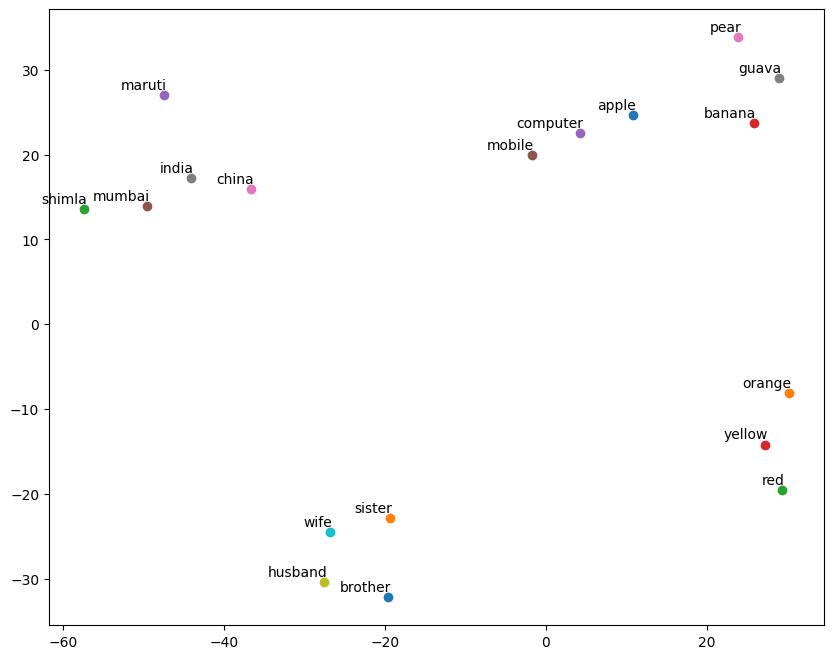

In [22]:
plt.figure(figsize = (10,8))
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(words[i],xy =(x[i],y[i]),
                xytext = (2,2),
                textcoords = 'offset points',
                ha = 'right',
                va = 'bottom')